# Backtesting Stocks Strategy

In [264]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from utils.OHLC_Helper import getAlphaOHLC

sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import yfinance as yf
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import talib
sns.set_theme(color_codes=True)
API_KEY = 'EC1W3AWVDZ3LA1T8'
ts= TimeSeries(key=API_KEY,output_format='pandas' )
ti = TechIndicators(key=API_KEY,output_format='pandas')
sns.set(rc={'figure.figsize':(30,9)})


In [265]:
interval = '5min'
start = '2020-01-01'
end = '2022-3-31'
# google,meta_data = ts.get_intraday(symbol="GOOG",interval=interval, outputsize='full',)
appleData,meta_data =ts.get_intraday(symbol='GOOG',interval=interval, outputsize='full',)
# appleData,meta_data =ts.get_daily(symbol='AAPL',outputsize='full')
apple = getAlphaOHLC(appleData,)
apple



,open,high,low,close,volume
date,,,,,
2022-04-05 07:50:00,2871.00,2871.00,2871.00,2871.00,110.0
2022-04-05 07:55:00,2870.24,2870.24,2870.24,2870.24,422.0
2022-04-05 08:00:00,2868.80,2868.80,2868.80,2868.80,355.0
2022-04-05 08:05:00,2870.67,2870.67,2870.67,2870.67,138.0
2022-04-05 08:25:00,2868.00,2868.00,2868.00,2868.00,526.0
...,...,...,...,...,...
2022-05-03 16:10:00,2362.59,2362.59,2362.59,2362.59,805.0
2022-05-03 16:15:00,2362.59,2362.59,2362.59,2362.59,375.0
2022-05-03 16:20:00,2362.59,2362.59,2362.59,2362.59,731.0


In [266]:
period = 40
apple['EMA_15']= apple['close'].ewm(span=period,min_periods=period).mean()
apple['rolling_std'] = apple['close'].rolling(window=period).std().shift(1)
apple['upper_band'] = apple['EMA_15'] + 1.6*apple['rolling_std']
apple['lower_band'] = apple['EMA_15'] - 1.6*apple['rolling_std']
df= apple[-700:]
px.line(df,y=['close','upper_band','lower_band'],title='Apple Stock Price')


/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

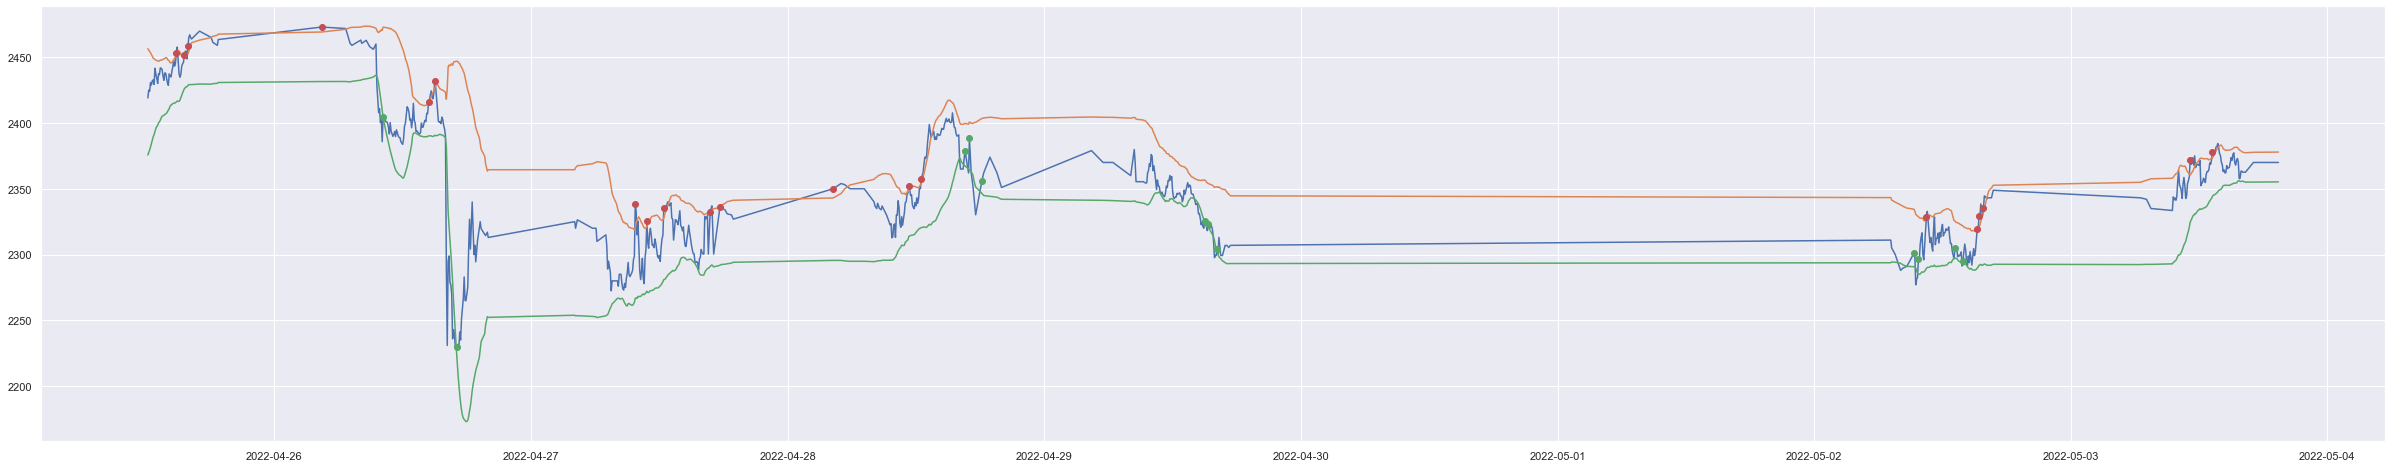

In [267]:
apple = apple[-700:]
apple['signal_upper'] = np.where(apple['close']>apple['upper_band'],1,0)
apple['entry_upper'] = apple.signal_upper.diff()
close_buy_signal = apple[apple['entry_upper']==1]
open_short_signal = apple[apple['entry_upper']==-1]
apple['signal_lower'] = np.where(apple['close']<apple['lower_band'],-2,0)
apple['entry_lower'] = apple.signal_lower.diff()
open_buy_signal = apple[apple['entry_lower']==2]
close_short_signal = apple[apple['entry_lower']==-2]
plt.figure(figsize=(42,8))
plt.plot(df['close'])
plt.plot(df['upper_band'])
plt.plot(df['lower_band'])
plt.plot(close_buy_signal.index,close_buy_signal['close'],'ro')
plt.plot(open_buy_signal.index,open_buy_signal['close'],'go')


/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

thnh


DatetimeIndex(['2022-04-26 14:25:00', '2022-04-27 09:45:00',
               '2022-05-02 10:30:00', '2022-05-02 15:15:00'],
              dtype='datetime64[ns]', name='date', freq=None)

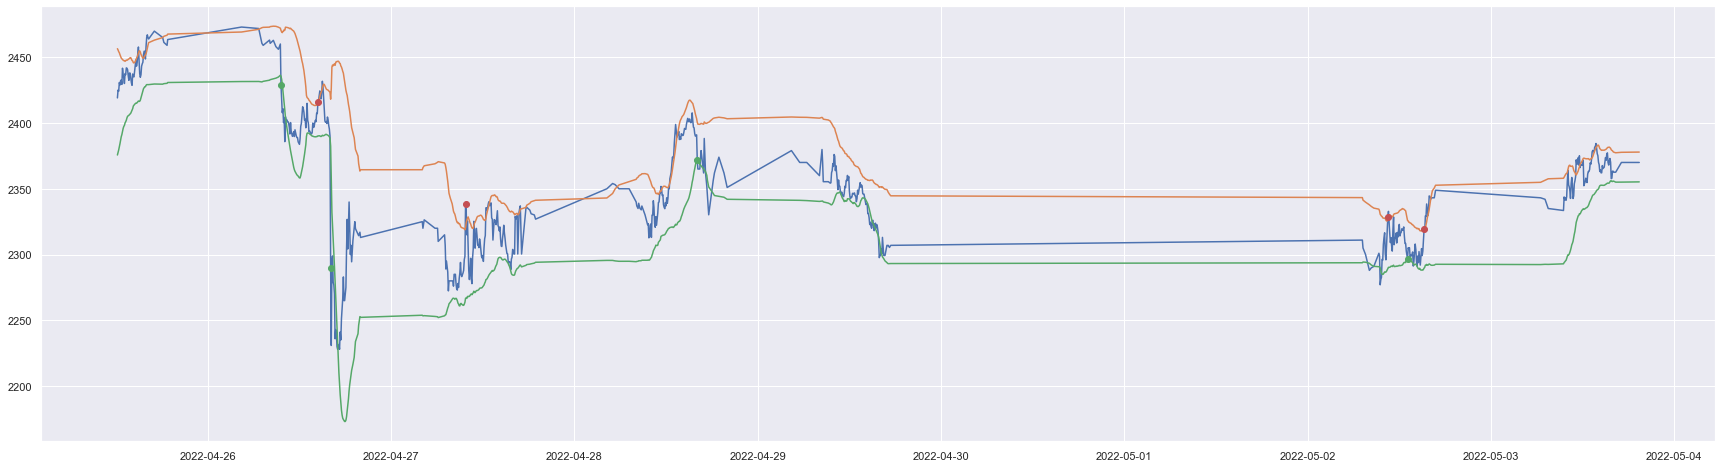

In [268]:

# iterate through apple data and create signals
last_buy_date=None
buy_dates = []
sell_dates = []
apple['isBuy'] = 0
apple['isSell'] = 0
for date,row in apple.iterrows():
    close = row['close']
    upper = row['upper_band']
    lower = row['lower_band']
    if(close>upper and last_buy_date is not None):
        # sell
        # print(f"sell on {date}")
        sell_dates.append(date)
        apple['isSell'][date]= 1
        last_buy_date = None
    elif(close<lower and last_buy_date is None):
        # buy
        # print(f"buy on {date}")
        buy_dates.append(date)
        apple['isBuy'][date]= 1
        last_buy_date = date
    else:
        pass
    # print(f' date {date}  close {row["close"]}')
buys = apple[apple['isBuy']==1]
sells = apple[apple['isSell']==1]

# print(buy_dates)
# print(sell_dates)

fig, ax = plt.subplots(figsize=(30,8))
# plt.figure(figsize=(42,8))
plt.plot(apple['close'])
plt.plot(apple['upper_band'])
plt.plot(apple['lower_band'])
plt.plot(sells.index,sells['close'],'ro')
plt.plot(buys.index,buys['close'],'go')
print('thnh')


sells.index




In [269]:
transactions = pd.concat([buys,sells],axis=0)
print(f'buys lengith {len(buys)}')
print(f'sells length {len(sells)}')
transactions.sort_index(inplace=True)
transactions

buys lengith 4
sells length 4


,open,high,low,close,volume,EMA_15,rolling_std,upper_band,lower_band,signal_upper,entry_upper,signal_lower,entry_lower,isBuy,isSell
date,,,,,,,,,,,,,,,
2022-04-26 09:35:00,2455.00,2455.00,2426.6001,2428.6097,77573.0,2452.918154,10.891938,2470.345254,2435.491053,0,0.0,-2,-2.0,1,0
2022-04-26 14:25:00,2405.54,2418.37,2405.5400,2415.6050,18610.0,2402.635900,7.790445,2415.100612,2390.171189,1,1.0,0,0.0,0,1
2022-04-26 16:05:00,2390.12,2415.00,2290.0000,2290.0000,69178.0,2400.269551,11.131558,2418.080043,2382.459059,0,0.0,-2,-2.0,1,0
2022-04-27 09:45:00,2299.45,2350.00,2299.4500,2338.6700,136839.0,2293.624517,16.725470,2320.385270,2266.863765,1,1.0,0,0.0,0,1
2022-04-28 16:05:00,2388.23,2388.23,2372.0000,2372.0000,15605.0,2386.861538,8.540957,2400.527069,2373.196006,0,0.0,-2,-2.0,1,0
2022-05-02 10:30:00,2316.20,2329.27,2314.8100,2328.6950,17361.0,2308.026567,11.588526,2326.568209,2289.484926,1,1.0,0,0.0,0,1
2022-05-02 13:05:00,2300.29,2300.29,2296.0000,2296.6900,11026.0,2311.628457,8.890742,2325.853644,2297.403269,0,0.0,-2,-2.0,1,0
2022-05-02 15:15:00,2311.85,2320.36,2310.0200,2319.4500,16166.0,2304.196239,9.051351,2318.678401,2289.714078,1,1.0,0,0.0,0,1


profits [-13.004699999999957, 48.67000000000007, -43.304999999999836, 22.759999999999764]


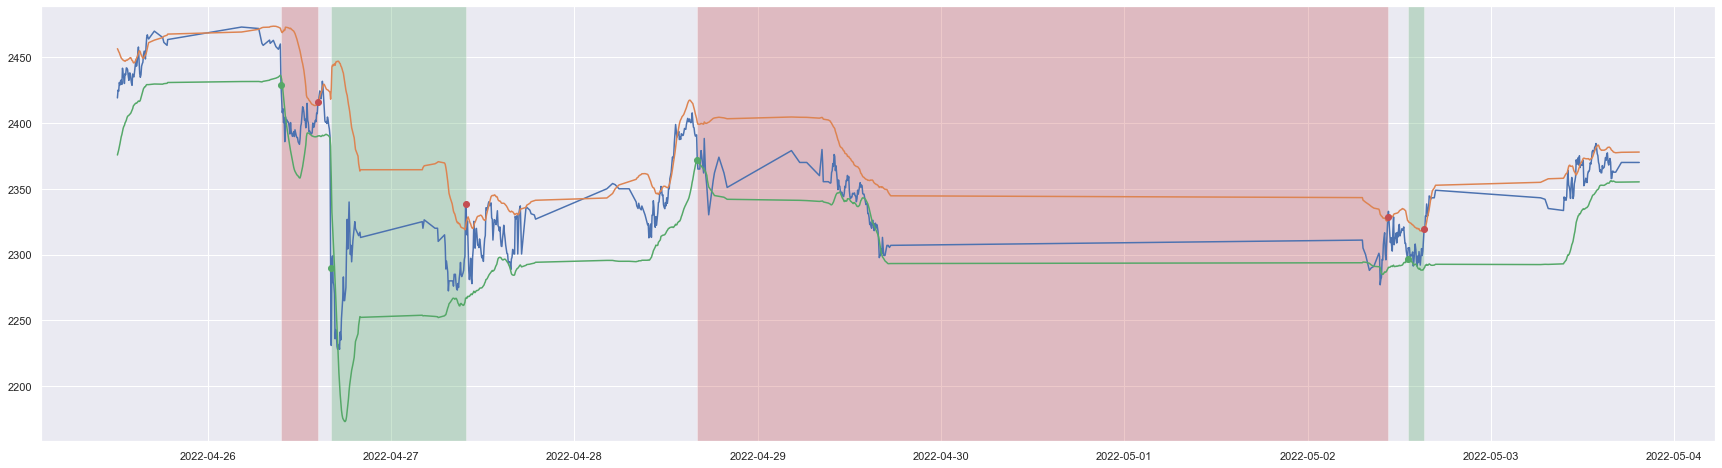

In [270]:
fig, ax = plt.subplots(figsize=(30,8))
# plt.figure(figsize=(42,8))
plt.plot(apple['close'])
plt.plot(apple['upper_band'])
plt.plot(apple['lower_band'])
plt.plot(sells.index,sells['close'],'ro')
plt.plot(buys.index,buys['close'],'go')



last_buy_date=None
last_buy_price=None
profits = []

for date,row in transactions.iterrows():
    if(row['isSell']==1):
        profit = row['close']-last_buy_price
        ax.axvspan(last_buy_date,date,facecolor='g' if profit>0 else 'r',alpha=0.3)
        profits.append(profit)
    else:
       last_buy_date = date
       last_buy_price = row['close']
print(f'profits {profits}')

In [271]:
print(f'number of transactions {len(transactions)}\n')

total_profit = sum(profits)
print(f'total profit {total_profit}')

buy_and_hold_profit = apple['close'][-1]-apple['close'][0]
print(f'buy and hold profit {buy_and_hold_profit}\n')

print(f'profit % {round((total_profit/buys["close"][0])*100,1)}')


number of transactions 8

total profit 15.120300000000043
buy and hold profit -49.05000000000018

profit % 0.6


In [272]:
profit_percent = (profits/buys['close'][0])*100
pd.Series(profit_percent).describe()

count    4.000000
mean     0.155648
std      1.659693
min     -1.783119
25%     -0.847389
50%      0.200841
75%      1.203878
max      2.004027
dtype: float64